In [1]:
import tensorflow as tf
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

## Generate Some Data with Artificial Pattern and Random Noise

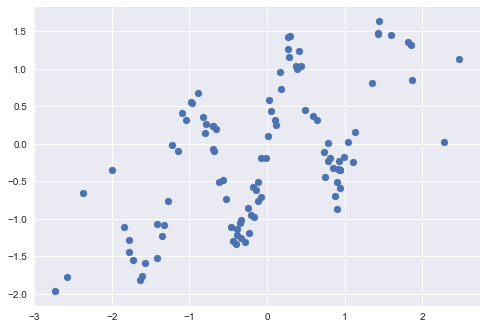

In [2]:
x = np.random.normal(0, 1, 100)
y = np.sin(x*5) + 0.5*x + np.random.normal(0, 0.2, 100)
plt.style.use('seaborn')
plt.scatter(x, y)
plt.show()

## Normalize and Center Our Data

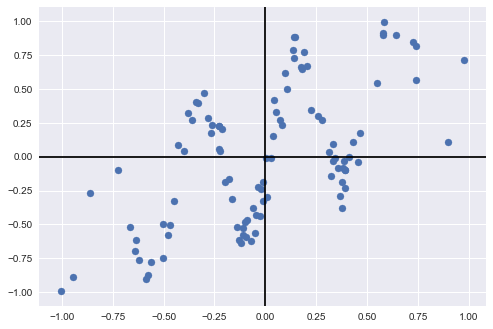

In [3]:
X = np.array([x, y]).T
scaler = MinMaxScaler((-0.99, 0.99))
X = scaler.fit_transform(X)
X -= X.mean(axis=0)
plt.scatter(X[:, 0], X[:, 1])
plt.axvline(c='black')
plt.axhline(c='black')
plt.show()

## Apply PCA to Reduce Dimension to One
1. We can extract (the only) principal component from the PCA() object when fitted
2. Our purpose is to visualize the compressed data in the original space

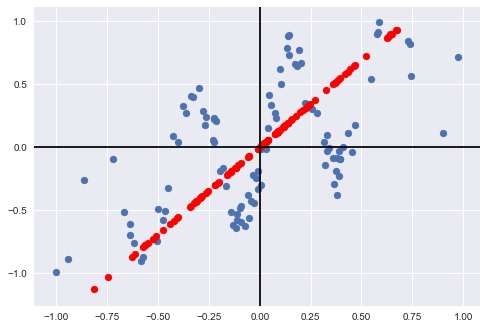

In [4]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_new = pca.inverse_transform(X_pca)
X_new = X_new

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_new[:, 0], X_new[:, 1], c='r')
plt.axvline(c='black')
plt.axhline(c='black')
plt.show()

## Auto-Encoder
1. We build an auto-encoder with input/output layer of size two, while the hidden layer has one unit.
2. The auto-encoder should be able to approximate what PCA does, and this can be examined by plotting out the decoded samples.

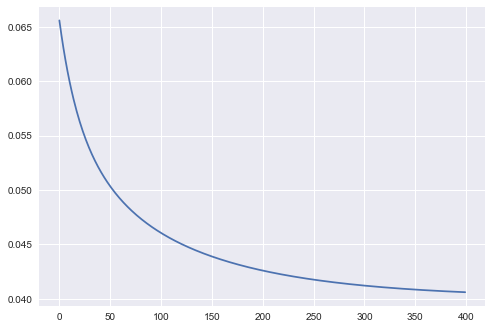

In [7]:
X_ph = tf.placeholder(tf.float32, shape=[None, 2])
w1 = tf.Variable(tf.random_normal([2, 1]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros(1))
compressed = tf.matmul(X_ph, w1) + b1
w2 = tf.Variable(tf.random_normal([1, 2]), dtype=tf.float32)
b2 = tf.Variable(tf.zeros(2))
X_out = tf.matmul(compressed, w2) + b2

# we use L-2 loss without regularization for this simple case
loss = tf.reduce_mean(tf.square(X_ph - X_out))
optimizer = tf.train.GradientDescentOptimizer(0.05)
train_op = optimizer.minimize(loss)

# now we train the AE
sess = tf.Session()
sess.run(tf.global_variables_initializer())
training_loss = []

# increase num of epochs til convergence or change the learning rate
for epoch in range(400):
    sess.run(train_op, feed_dict={X_ph: X})
    training_loss.append(sess.run(loss, feed_dict={X_ph: X}))
plt.plot(training_loss)
plt.show()

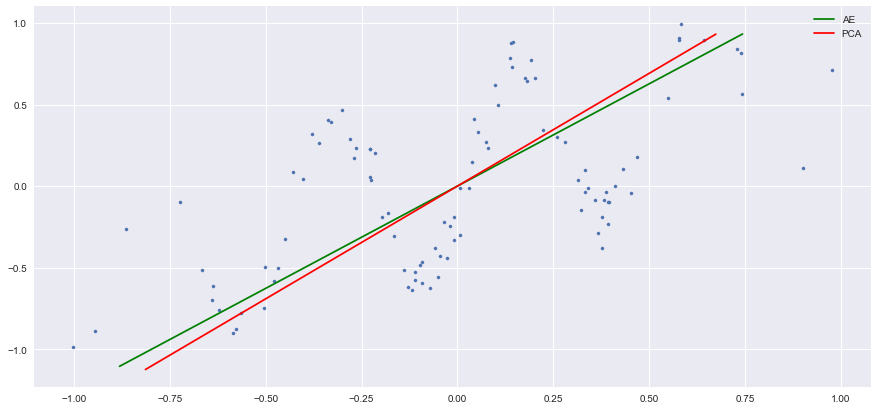

In [8]:
decoded = sess.run(X_out, feed_dict={X_ph: X})
# order the arr so lineplots dont cross
pca_order = np.argsort(X_new[:, 0])
ae_order = np.argsort(decoded[:,0])

plt.figure(figsize=(15, 7))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(decoded[:, 0][ae_order], decoded[:, 1][ae_order], c='green', label='AE')
plt.plot(X_new[:, 0][pca_order], X_new[:, 1][pca_order], c='r', label='PCA')
plt.legend()
plt.show()

## Higher Dimensions
1. We have shown that in one dimensional case, AE is able to approximate PCA quite well. Now we proceed to higher dimension spaces.
2. On top of the previous data, we add the third axis.
3. We will experiment on using PCA and AE to compress them back to two dimentions.

In [9]:
x = np.random.normal(0, 1, 100)
y = np.sin(x*5) + 0.5*x + np.random.normal(0, 0.2, 100)
z = x**2 + y**2 + np.random.normal(0, 0.1, 100)
X = np.array([x, y, z]).T
scaler = MinMaxScaler((-1,1))
X = scaler.fit_transform(X)

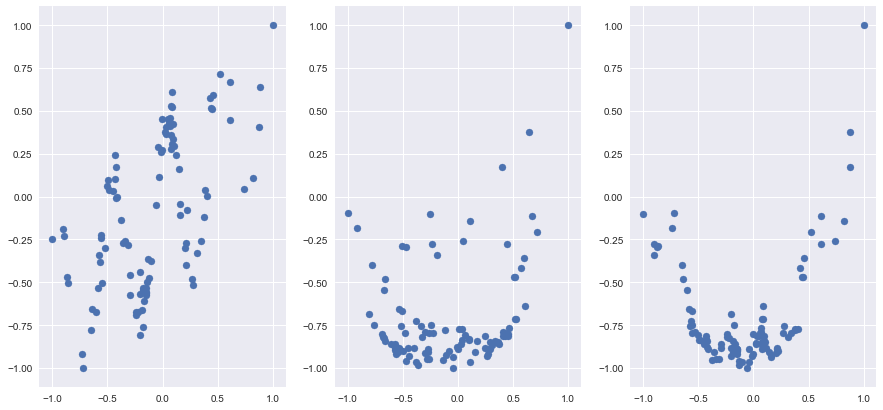

In [10]:
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1])
plt.subplot(132)
plt.scatter(X[:, 1], X[:, 2])
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 2])
plt.show()

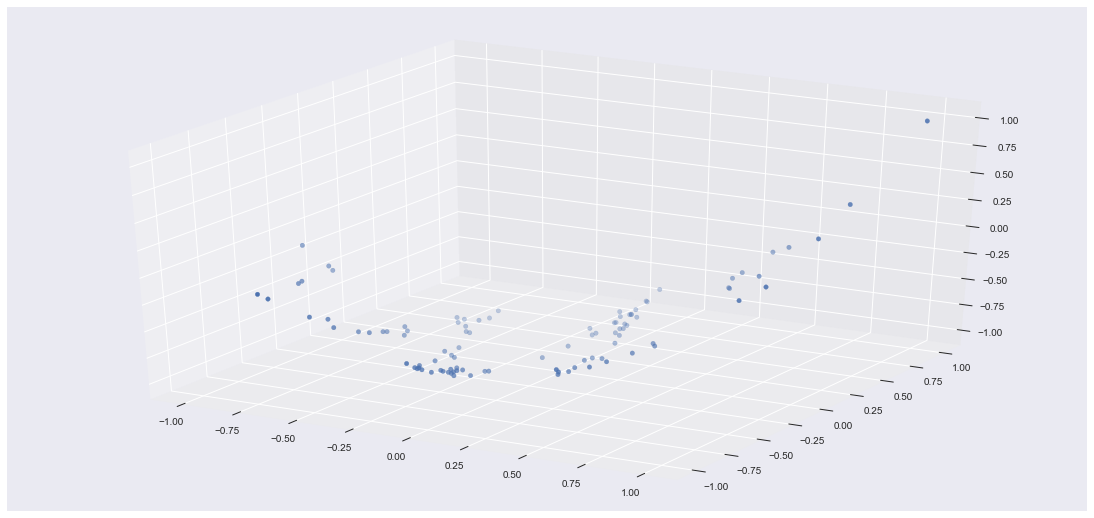

In [11]:
fig = plt.figure(1, figsize=(15, 7))
plt.clf()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

## PCA with 2 Principal Components
1. PCA will find a hyperplane in our three dimensional space on which the projection of our sample points has maximum variance.
2. Let's visualize the hyperplane in a 3D space.

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_new = pca.inverse_transform(X_pca)
prin_comp = pca.components_
prin_comp

array([[ 0.65205702,  0.72112468,  0.23409579],
       [-0.10584429, -0.21915811,  0.96993129]])

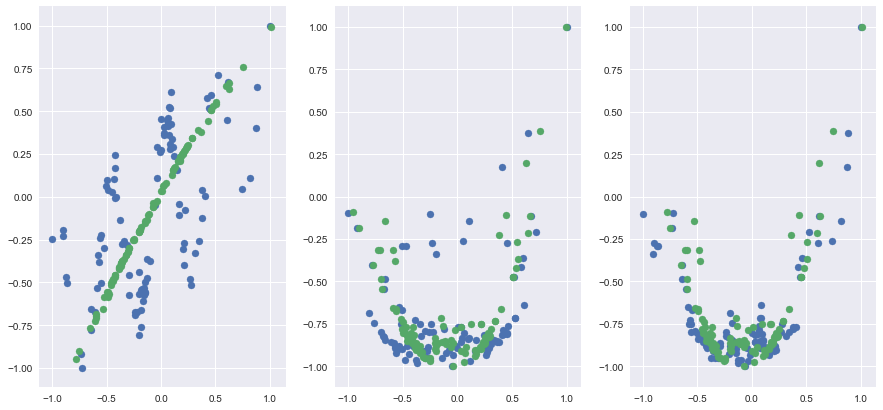

In [13]:
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.subplot(132)
plt.scatter(X[:, 1], X[:, 2])
plt.scatter(X_new[:, 1], X_new[:, 2])
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 2])
plt.scatter(X_new[:, 0], X_new[:, 2])
plt.show()

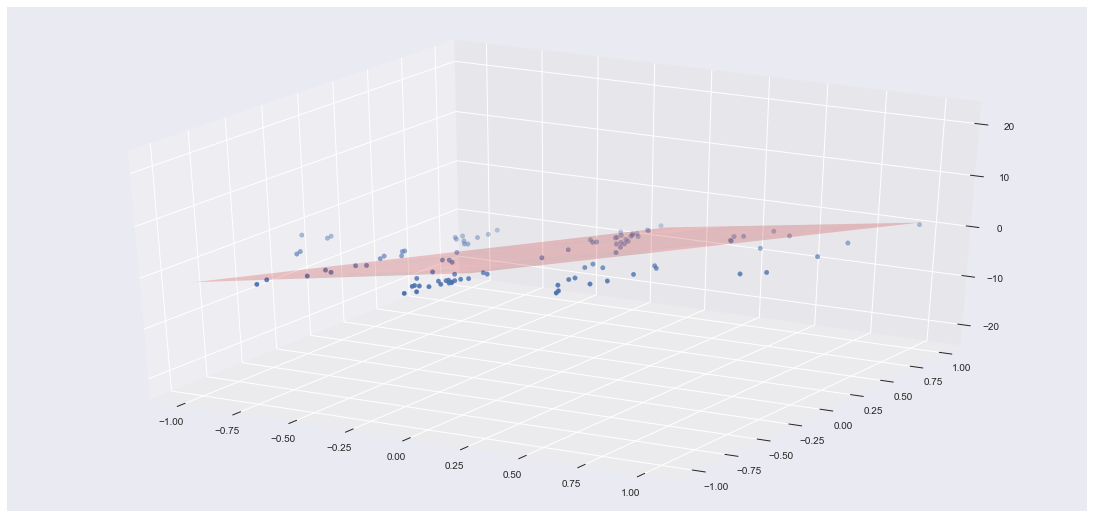

In [14]:
axes = [-1., 1., -1., 1., -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

fig = plt.figure(1, figsize=(15, 7))
plt.clf()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.plot_surface(x1, x2, z, alpha=0.2, color="r")
plt.show()

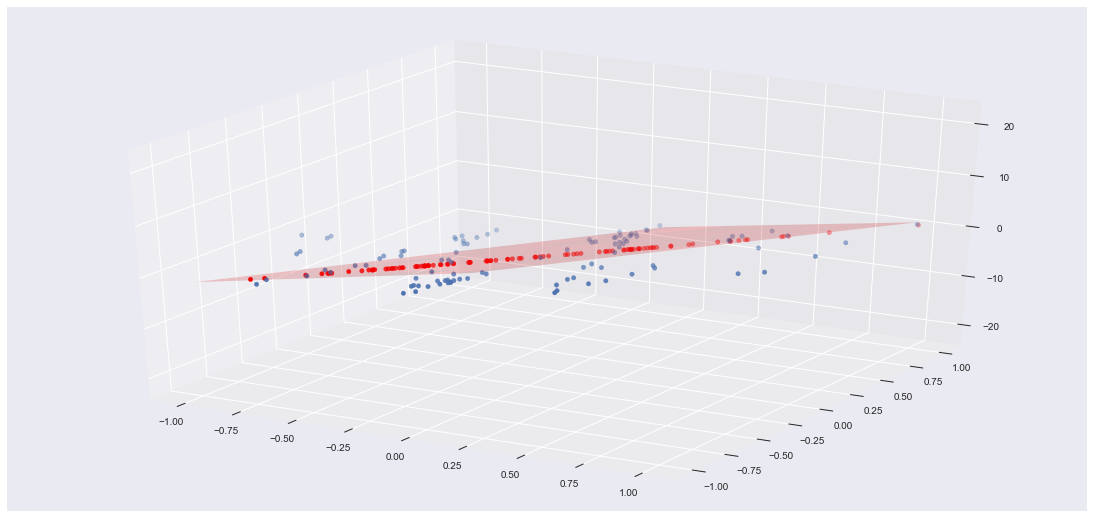

In [15]:
fig = plt.figure(1, figsize=(15, 7))
plt.clf()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c='r')
ax.plot_surface(x1, x2, z, alpha=0.2, color="r")
plt.show()

## Auto-Encoder with 2 Hidden Units
1. Now lets grant more power to the auto-encoder, by having two hidden unit, which also corresponds to compressing data into two dimentions. 
2. Furthermore, we add sigmoid activation function to the hidden layer. How will this non-linearity changes the capability of reconstructing the inputs? Turns out the reconstructed sample points form a highly non-trivial manifold, which grants us much more complexity to reconstruct points.

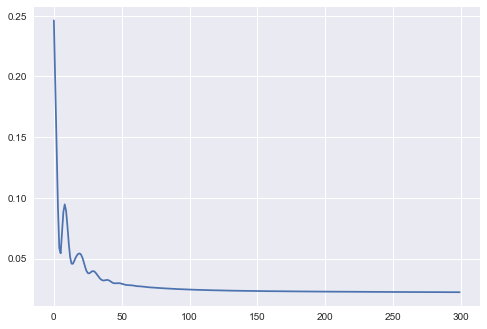

In [16]:
X_ph = tf.placeholder(tf.float32, shape=[None, 3])
w1 = tf.Variable(tf.random_normal([3, 2]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros(2))
z1 = tf.matmul(X_ph, w1) + b1
compressed = tf.nn.sigmoid(z1)
w2 = tf.Variable(tf.random_normal([2, 3]), dtype=tf.float32)
b2 = tf.Variable(tf.zeros(3))
z2 = tf.matmul(compressed, w2) + b2
X_out = tf.nn.tanh(z2)

loss = tf.reduce_mean(tf.square(X_ph - X_out))
optimizer = tf.train.AdamOptimizer(0.1)
train_op = optimizer.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
training_loss = []
for epoch in range(300):
    sess.run(train_op, feed_dict={X_ph: X})
    training_loss.append(sess.run(loss, feed_dict={X_ph: X}))
plt.plot(training_loss)
plt.show()

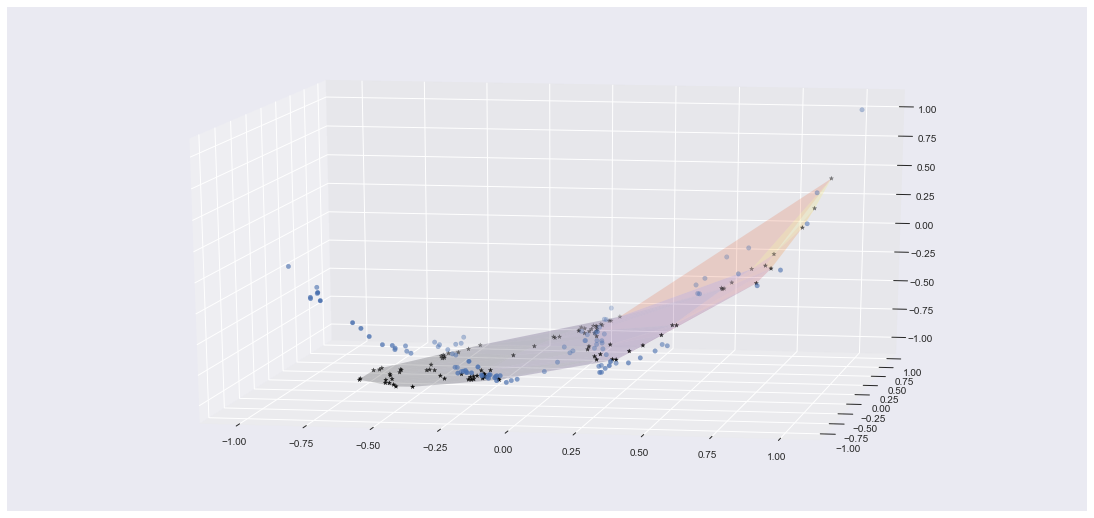

In [29]:
import matplotlib.tri as mtri
decoded = sess.run(X_out, feed_dict={X_ph: X})
decoded = decoded[np.argsort(decoded[:, 0])]

triang = mtri.Triangulation(decoded[:, 0], decoded[:, 1])

fig = plt.figure(1, figsize=(15, 7))
plt.clf()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.plot_trisurf(triang, decoded[:, 2], cmap='inferno', alpha=0.2)
ax.scatter(decoded[:, 0], decoded[:, 1], decoded[:, 2], 
           marker='*', s=20, c="black")
ax.view_init(elev=15, azim=280)
plt.show()

## Reconstruction Loss
Indeed, we see that AE achieved more accurate reconstruction than PCA by having that manifold rather than a hyperplane.

In [35]:
decoded = sess.run(X_out, feed_dict={X_ph: X})
print('Reconstruction loss of PCA: {}'.format(np.sqrt(np.square(X - X_new).mean())))
print('Reconstruction loss of AE: {}'.format(np.sqrt(np.square(X - decoded).mean())))

Reconstruction loss of PCA: 0.16112694643787617
Reconstruction loss of AE: 0.14918606386111022


## Plot.ly Version
Interactivate plot using plot.ly. 

In [60]:
import plotly.plotly as py
import plotly.figure_factory as FF
import plotly.graph_objs as go
from scipy.spatial import Delaunay

tri_pca = Delaunay(X_new[:, :2])
simplices_pca = tri_pca.simplices

fig_pca = FF.create_trisurf(x=X_new[:, 0], y=X_new[:, 1], z=X_new[:, 2], 
                        simplices=simplices_pca, 
                           colormap=['rgb(66, 134, 244)', 'rgb(66, 134, 244)', 'rgb(66, 134, 244)'])

decoded = decoded[np.argsort(decoded[:, 0])]
tri_ae = Delaunay(decoded[:, :2])
simplices_ae = tri.simplices
fig_ae = FF.create_trisurf(x=decoded[:, 0], y=decoded[:, 1], z=decoded[:, 2], 
                        simplices=simplices_ae, 
                           colormap=['rgb(50, 0, 75)', 'rgb(200, 0, 200)', '#c8dcc8'])
fig = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers')
layout = go.Layout(
    width=700,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
py.iplot(go.Figure(data=[fig_pca.data[0], fig_pca.data[1], fig_ae.data[0], fig_ae.data[1],
                         fig]), layout=layout)